Min Document Frequency: 2
Extracted Number of Terms: 17169

Min Document Frequency: 5
Extracted Number of Terms: 7692

Min Document Frequency: 8
Extracted Number of Terms: 5595

Min Document Frequency: 11
Extracted Number of Terms: 4484

Min Document Frequency: 14
Extracted Number of Terms: 3706

Min Document Frequency: 17
Extracted Number of Terms: 3205

Min Document Frequency: 20
Extracted Number of Terms: 2815

Min Document Frequency: 23
Extracted Number of Terms: 2546



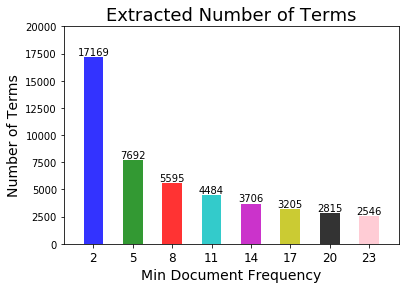

In [20]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import re 
import matplotlib.pyplot as plt

# define two classes
computer_technology_class = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
recreational_activity_class = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

# load data from training subsets and test subsets respectively, and remove headers, footers and quotes
comp_tech_train = fetch_20newsgroups(subset='train', categories=computer_technology_class, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
comp_tech_test = fetch_20newsgroups(subset='test', categories=computer_technology_class, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_train = fetch_20newsgroups(subset='train', categories=recreational_activity_class, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
rec_act_test = fetch_20newsgroups(subset='test', categories=recreational_activity_class, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

# for stemmed version words later
stemmer = SnowballStemmer("english")

# remove punctuations and use stemmed version words
def trim_and_stem(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(stemmer.stem(temp[j])) # stem() turned words into lowercase            
        data_list[i] = " ".join(ans)

trim_and_stem(comp_tech_train.data)
trim_and_stem(comp_tech_test.data)
trim_and_stem(rec_act_train.data)
trim_and_stem(rec_act_test.data)

# exclude stop words and create TFxIDF
index = []
values = []
for i in range(2,25,3):
    index.append(i)
    count_vect = CountVectorizer(min_df=i, stop_words ='english')
    X_counts = count_vect.fit_transform(comp_tech_train.data+comp_tech_test.data+rec_act_train.data+rec_act_test.data)
    tfidf_transformer = TfidfTransformer()
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    values.append(X_tfidf.shape[1])
    print 'Min Document Frequency: ' + str(i) + '\n',
    print 'Extracted Number of Terms: ' + str(X_tfidf.shape[1])
    print ''

# plot histogram
fig, ax = plt.subplots()
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink']
ax.set_xticks([i+0.75 for i in index])
ax.set_xticklabels(index, fontsize = 12)
rects = plt.bar(index, values, 1.5, align='edge', alpha = 0.8, color = color)
plt.xlabel('Min Document Frequency', fontsize = 14)
plt.ylabel('Number of Terms', fontsize = 14)
plt.title('Extracted Number of Terms', fontsize = 18)
plt.axis([0.5,26,0,20000])
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height, '%d' % int(height), ha='center', va='bottom')
plt.show()
